![logo.png](https://github.com/interviewquery/takehomes/blob/stripe_1/stripe_1/logo.png?raw=1)



## Assignment

You are leading a project to analyze product performance at Stripe. We at Stripe are most interested in how the products are performing and growing as well as how to prioritize our product development efforts to maximize our growth. You have been provided an initial cut of data on a few flagship products, each of which is targeted at a specific user segment. From the data you've been given, solve these questions.

### Questions to guide thinking:

1. How are each of Stripe's products and segments performing and where are they headed?

**Solution:**
Segment and Product Performance Analysis:

- **Platform (Marketplace)**: Highest revenue generator, strong correlation between events and revenue, indicating scalable growth and consistent performance.

- **E-commerce (Cart)**: High engagement but low conversion with a 23.2% successful payment rate shows a classic e-commerce challenge – high top-of-funnel engagement with significant drop-off. This suggests a need for funnel optimization strategies..

- **SaaS (Basic API and Recurring)**: Basic API has a higher total USD amount but lower event count, suggesting it caters to higher-value, potentially enterprise-level clients with less frequent but larger transactions. Recurring has a higher event count but lower USD amount, likely serves a broader base of smaller clients or subscriptions. Steady growth with complementary strengths - Basic API has higher value transactions, while Recurring has higher frequency.

All products show end-of-year spikes, indicating seasonal trends or successful year-end strategies.



2. Are there any issues with the products that we should address?

**Solution:**
Strategic Issues and Opportunities:


**E-commerce Conversion Optimization**: 

- Low Conversion Rate:
    - Only 23.2% successful payment rate from checkout to completed payment. 
    - Significant revenue leakage due to cart abandonment.
    - Indicates potential issues with user experience, payment options.
- Funnel Drop-offs:
    - High event count for Cart.ViewItem, but significant drop-offs at each subsequent stage
    -  Suggests problems with user engagement and progression through the purchase funnel
    - Potential issues with product presentation, pricing clarity, or user interface
- Seasonality Challenges:
    - Significant spikes in USD Amount and Average Transaction Value at year-end
    - Potential strain on system resources during peak periods
- Transaction Value Volatility:
    - Fluctuations in Average Transaction Value, especially at the beginning and end of the analyzed period
    - Makes revenue prediction and resource allocation challenging
    - Might indicate inconsistent customer base or product offering

**SaaS Product Positioning**: 

- Revenue-event mismatch: Basic API has higher revenue but lower event count than Recurring.
- Product positioning confusion: Unclear value proposition between Basic API and Recurring products.
- Seasonality management: Significant end-of-year spikes requiring careful resource allocation.
- Customer segmentation challenges: Potential overlap between the two products.
- Pricing strategy concerns: Possible underpricing of Recurring product given its high event count.

- Seasonal Preparedness: The consistent end-of-year spike across products necessitates a comprehensive seasonal strategy, including infrastructure scaling and targeted marketing.


3. Given more time and access to more data, what would you want to dig deeper on?

**Solution:** Priority areas for deeper analysis:

- Customer cohort analysis across segments for long-term value and churn patterns.
- Price elasticity modeling, especially for SaaS products.    E-commerce Funnel Optimization: Implement an advanced A/B testing framework focusing on checkout UX, payment options, and dynamic incentives based on cart value and user behavior.
- Marketplace supply-demand dynamics and participant retention.
- Geospatial analysis for regional performance variations.
- Machine learning models for real-time conversion optimization in e-commerce.
- Cross-segment user journey analysis to identify synergy opportunities

4. How should we prioritize development for different products, given our limited resources?

**Solution:** Prioritization Strategy

    
    
- E-commerce Funnel Optimization: Implement an advanced A/B testing framework focusing on checkout UX, payment options, and dynamic incentives based on cart value and user behavior.
- Marketplace Enhancement: Develop advanced seller tools and buyer-side features to strengthen network effects. Consider implementing ML algorithms to increase transaction frequency and value.
- SaaS Product Evolution:
    - Recurring: Develop a tiered pricing model with advanced features to drive up ATV while maintaining broad appeal.
    -  Basic API: Create enterprise-focused solutions and high-touch support to justify premium pricing and drive adoption among high-value clients.
- Cross-Segment Integration: Develop a unified dashboard for clients using multiple Stripe products, offering integrated analytics and cross-product incentives to increase overall platform stickiness.
- Data Infrastructure Upgrade: Invest in real-time data processing capabilities to enable dynamic pricing, fraud detection, and personalized user experiences across all products.








## Solution 

**Product Usage Table:**

|Label| Description|
| - | :- |  
| `merchant` | This is the unique ID of each Stripe user |
|`date` | Data is aggregated up to the month level for each Stripe user.|
|`product` | This is the Stripe product that the user is using to charge their customers.|
|`event` | This is an action within a product. For more details on how products are used, see "segment details" below|
|`count of events` |       |
|`usd_amount` |Total amount in cents and USD that was processed for that API call|

**Segment Table:**

This is a mapping of merchant IDs to the user segmentation we have.

|Label| Description|
| - | :- |
|`saas`| These businesses serve SaaS products which means they primarily charge their customers on a recurring basis (usually   monthly). We want them to use our Subscriptions payments product to charge regularly on a time interval.|
|`ecommerce` | These businesses use Stripe's shopping cart product and primarily sell physical or digital goods online. |
|`platforms` | These users are platforms upon which other users can sign up and charge for services through the Stripe API. Examples would include ridesharing services, delivery services, etc. (e.g. Lyft, Task Rabbit, Instacart) |


## Segment Details

### SaaS

SaaS users have two options when they process recurring payments. The recurring payments product allows them to schedule automatically recurring payments on a fixed schedule, but the merchants can also manually create charges on Stripe for their recurring payments. Our hope with the recurring payments product is to make it easy for all users to automate their payments. The product was launched in May 2013.

### E-Commerce Store

Our shopping cart product enables online e-commerce stores to sell goods. We track details on their website around the conversion funnel and actions that customers take. We can see when an item is viewed, added to the cart, when the checkout flow is initiated, and when it is completed with a payment submitted.

### Platforms

Our Marketplace product allows platforms to charge on behalf of other users and payout funds to each end automatically.

In [1]:
!git clone --branch stripe_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/stripe_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1927 (delta 726), pack-reused 0 (from 0)
Receiving objects: 100% (1963/1963), 297.43 MiB | 8.27 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/stripe_1
ls: cannot access '*.zip': No such file or directory
logo.png  product_usage.csv  segmentation.csv  takehomefile.ipynb


In [2]:
# Write your code here
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Read the data
product_df = pd.read_csv('/content/takehomes/stripe_1/product_usage.csv')
segment_df = pd.read_csv('/content/takehomes/stripe_1/segmentation.csv')

In [4]:
# Data Preparation and Cleaning
product_df.drop(columns = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                           'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                           'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21' ], axis = 1, inplace = True)

In [5]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Merchant         1252 non-null   object 
 1   Date             1252 non-null   object 
 2   Product          1252 non-null   object 
 3   Event            1252 non-null   object 
 4   Count of events  1252 non-null   float64
 5   Usd Amount       598 non-null    float64
dtypes: float64(2), object(4)
memory usage: 67.9+ KB


In [6]:
# Change data type
product_df['Date'] = pd.to_datetime(product_df['Date'])

In [7]:
product_df.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0


In [8]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Merchant  33 non-null     object
 1   Segment   33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [9]:
segment_df.head()

,Merchant,Segment
0,282t1vpldi,SaaS
1,2x5fpa2a9k9,SaaS
2,39rrckrzfr,SaaS
3,3r5r60f6r,Platform
4,4p36czyqfr,Platform


In [10]:
# Merge the data
merged_df = pd.merge(product_df, segment_df, on = 'Merchant', how = 'left')
merged_df.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,SaaS
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,SaaS
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,SaaS
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,SaaS
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,SaaS


In [11]:
# Handling missing values
# Fill null values in Usd Amount because not all events(cart.viewItem, cart.addItem, cart.checkout) correspond to monetary transactions
merged_df['Usd Amount'].fillna(0, inplace = True)
merged_df.info()

# Remove missing values
merged_df.dropna(inplace = True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Merchant         1252 non-null   object        
 1   Date             1252 non-null   datetime64[ns]
 2   Product          1252 non-null   object        
 3   Event            1252 non-null   object        
 4   Count of events  1252 non-null   float64       
 5   Usd Amount       1446 non-null   float64       
 6   Segment          1252 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 79.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Merchant         1252 non-null   object        
 1   Date             1252 non-null   datetime64[ns]
 2   Product          1252 non-n

In [12]:
product_type = merged_df['Product'].unique()
product_type

array(['Basic API', 'Recurring', 'Marketplaces', 'Cart'], dtype=object)

In [13]:
event_type = merged_df['Event'].unique()
event_type

array(['Charge', 'Subscription.Charge', 'Marketplace.Charge',
       'Cart.AddItem', 'Cart.Checkout', 'Cart.PaymentSubmit',
       'Cart.ViewItem'], dtype=object)

In [14]:
# EDA
# Analyze product usage
product_usage = merged_df.groupby('Product').agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()
product_usage


,Product,Count of events,Usd Amount
0,Basic API,54261.0,8.647767e+07
1,Cart,11943599.0,5.585107e+08
2,Marketplaces,522102.0,1.531997e+09
3,Recurring,123992.0,4.884847e+07


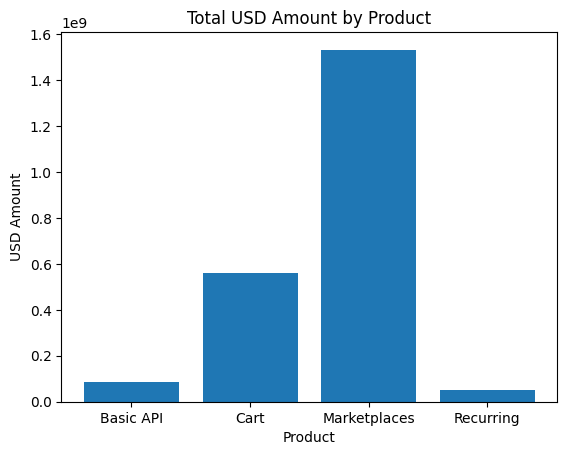

In [15]:
# Visulaize product usage
import matplotlib.pyplot as plt
import seaborn as sns

# Usd Amount by Product
plt.bar(product_usage['Product'], product_usage['Usd Amount'])
plt.xlabel('Product')
plt.ylabel('USD Amount')
plt.title('Total USD Amount by Product')
plt.show()

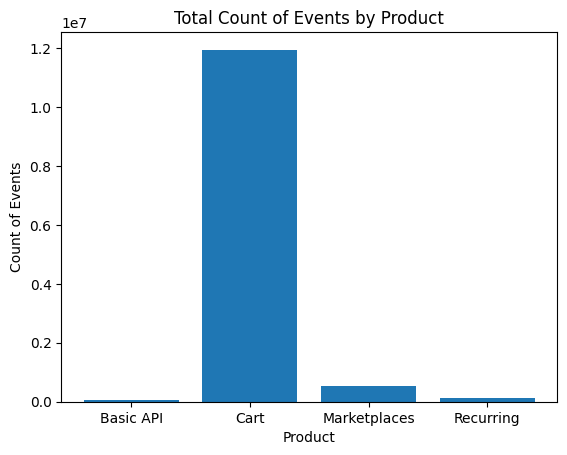

In [16]:
# Count of Events by Products
plt.bar(product_usage['Product'], product_usage['Count of events'])
plt.xlabel('Product')
plt.ylabel('Count of Events')
plt.title('Total Count of Events by Product')
plt.show()

In [17]:
# Analyze segment performance
segment_performance = merged_df.groupby('Segment').agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()
segment_performance.sort_values(by = 'Usd Amount', ascending = False)

,Segment,Count of events,Usd Amount
1,Platform,522102.0,1.531997e+09
0,E-Commerce Store,11943599.0,5.585107e+08
2,SaaS,178253.0,1.353261e+08


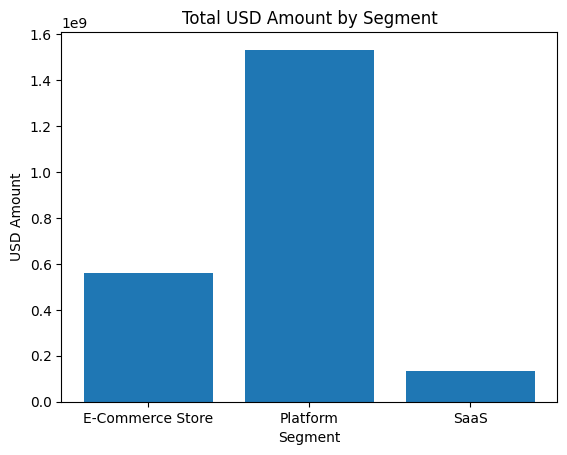

In [18]:
# Visualize segment performance
plt.bar(segment_performance['Segment'], segment_performance['Usd Amount'])
plt.xlabel('Segment')
plt.ylabel('USD Amount')
plt.title('Total USD Amount by Segment')
plt.show()

In [19]:
# Analyze SaaS segment and corresponding products i.e. Basic API and Recurring Payments for which the events are Charge and Subscription.charge
saas_df = merged_df[merged_df['Segment'] == 'SaaS']
saas_df.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,SaaS
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,SaaS
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,SaaS
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,SaaS
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,SaaS


     Product  Count of events  Usd Amount
0  Basic API          54261.0  86477666.0
1  Recurring         123992.0  48848473.0




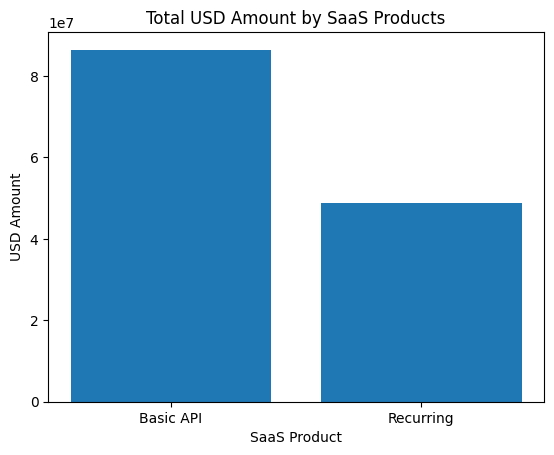

In [20]:
# Product Comparison
saas_pdt = saas_df.groupby('Product').agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()
print(saas_pdt)

print('\n')
plt.bar(saas_pdt['Product'], saas_pdt['Usd Amount'])
plt.xlabel('SaaS Product')
plt.ylabel('USD Amount')
plt.title('Total USD Amount by SaaS Products')
plt.show()

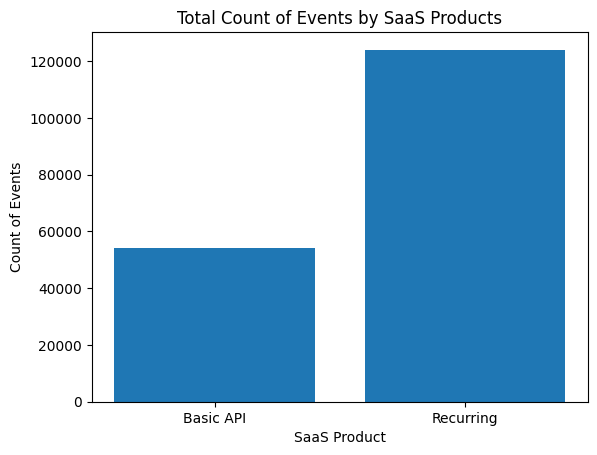

In [21]:
plt.bar(saas_pdt['Product'], saas_pdt['Count of events'])
plt.xlabel('SaaS Product')
plt.ylabel('Count of Events')
plt.title('Total Count of Events by SaaS Products')
plt.show()

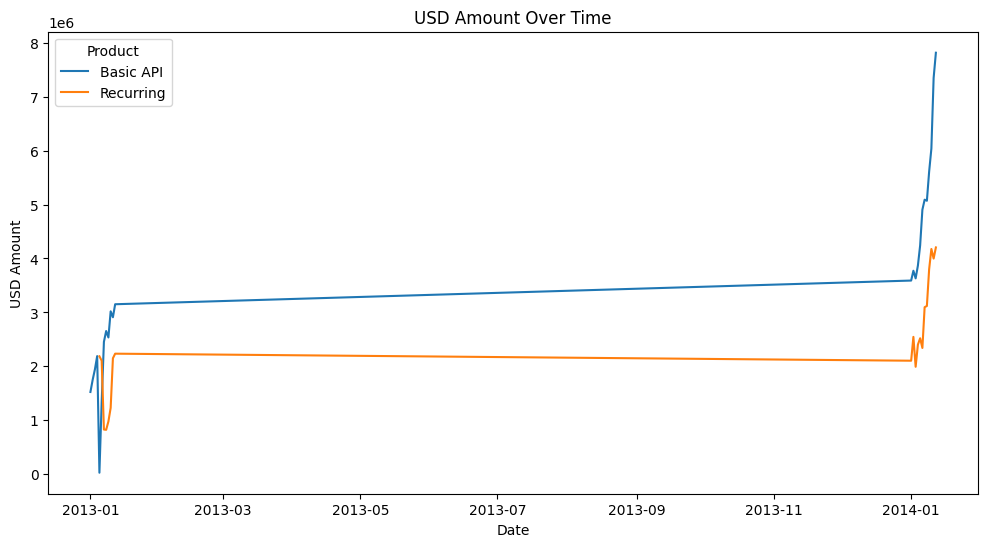

In [22]:
# Time Series Analysis
saas_time_series = saas_df.groupby(['Date', 'Product']).agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()

# Plotting
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Date', y = 'Usd Amount', data = saas_time_series, hue = 'Product')
plt.xlabel('Date')
plt.ylabel('USD Amount')
plt.title('USD Amount Over Time')
plt.show()


     Product  Count of events  Usd Amount  Average Transaction Value
0  Basic API          54261.0  86477666.0                1593.735206
1  Recurring         123992.0  48848473.0                 393.964715




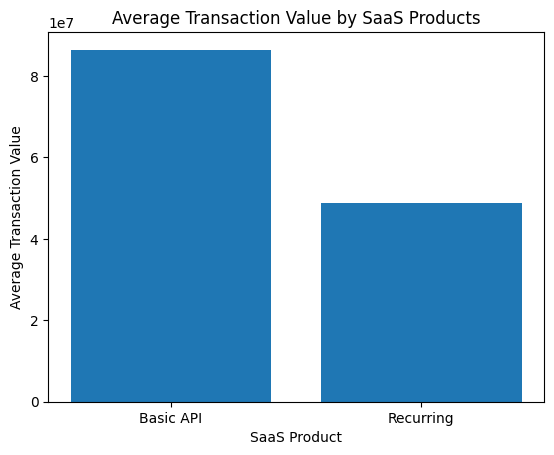

In [23]:
# Average Transaction Value
saas_pdt['Average Transaction Value'] = saas_pdt['Usd Amount'] / saas_pdt['Count of events']
saas_avg_trans = saas_pdt.sort_values(by = 'Average Transaction Value', ascending = False)
print(saas_avg_trans)

print('\n')
plt.bar(saas_avg_trans['Product'], saas_avg_trans['Usd Amount'])
plt.xlabel('SaaS Product')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value by SaaS Products')
plt.show()

In [24]:
# Analyze Ecommerce segment and corresponding product i.e Cart for which the events are Cart.ViewItem, Cart.AddItem, Cart.Checkout, Cart.PaymentSubmit
ecomm_df = merged_df[merged_df['Segment'] == 'E-Commerce Store']
ecomm_df.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
147,8kkxv1xxbt9,2013-01-08,Cart,Cart.AddItem,6877.0,0.0,E-Commerce Store
148,8kkxv1xxbt9,2013-01-09,Cart,Cart.AddItem,6495.0,0.0,E-Commerce Store
149,8kkxv1xxbt9,2013-01-10,Cart,Cart.AddItem,7293.0,0.0,E-Commerce Store
150,8kkxv1xxbt9,2013-01-11,Cart,Cart.AddItem,6435.0,0.0,E-Commerce Store
151,8kkxv1xxbt9,2013-01-12,Cart,Cart.AddItem,8709.0,0.0,E-Commerce Store


Event
Cart.ViewItem         100.000000
Cart.AddItem           18.738960
Cart.Checkout          13.559689
Cart.PaymentSubmit      3.162472
Name: Count of events, dtype: float64




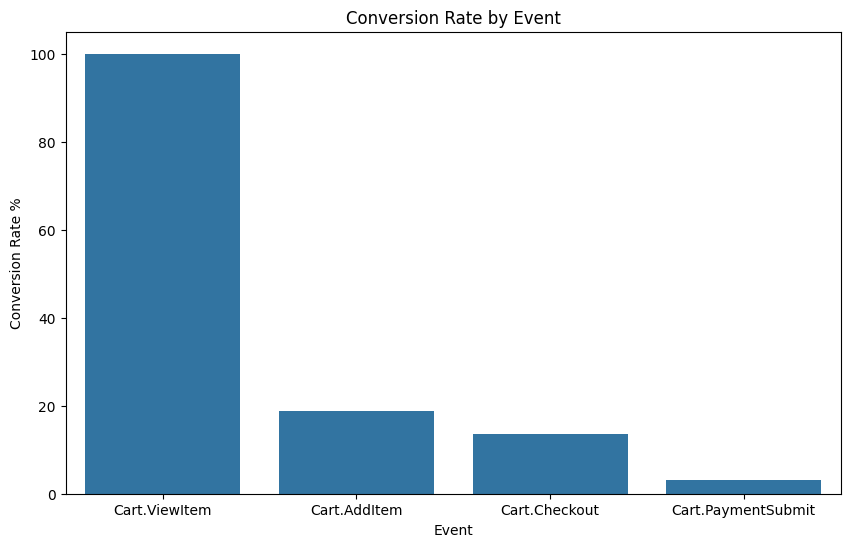

In [25]:
# Conversion Funnel Analysis
funnel_data = ecomm_df.groupby('Event')['Count of events'].sum().reindex(['Cart.ViewItem', 'Cart.AddItem', 'Cart.Checkout', 'Cart.PaymentSubmit'])
conversion_rate = funnel_data/funnel_data['Cart.ViewItem'] *100
print(conversion_rate)

print('\n')
plt.figure(figsize = (10,6))
sns.barplot(x = conversion_rate.index, y = conversion_rate.values)
plt.xlabel('Event')
plt.ylabel('Conversion Rate %')
plt.title('Conversion Rate by Event')
plt.show()


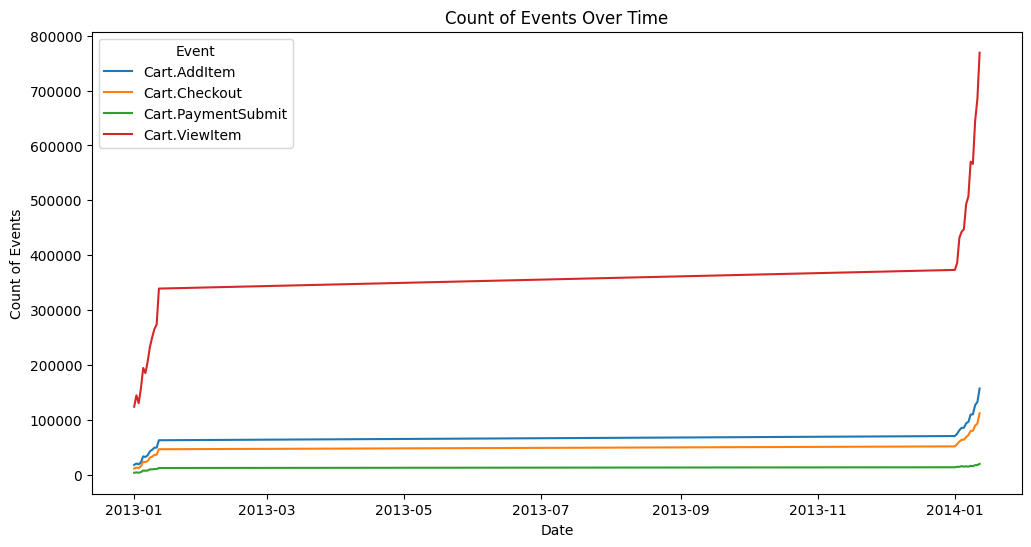

In [26]:
# Time series Analysis
ecomm_time_series = ecomm_df.groupby(['Date', 'Event']).agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Date', y = 'Count of events', data=ecomm_time_series, hue = 'Event')
plt.xlabel('Date')
plt.ylabel('Count of Events')
plt.title('Count of Events Over Time')
plt.show()


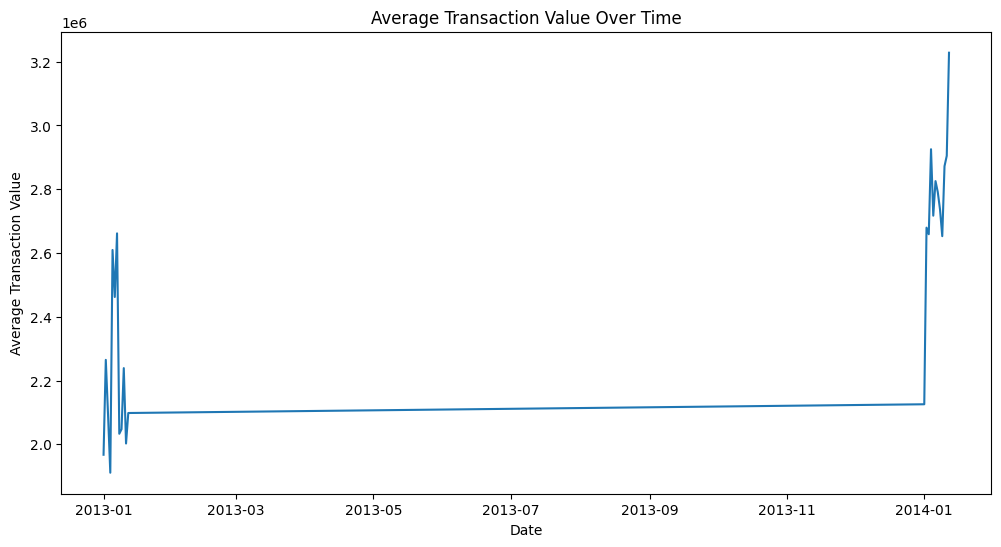

In [27]:
# Average transaction value
ecomm_avg_trans = ecomm_df[ecomm_df['Event'] == 'Cart.PaymentSubmit'].groupby('Date')['Usd Amount'].mean()
#print(f"Average Transaction Value: {ecomm_avg_trans.round(2)}")

print('\n')
plt.figure(figsize = (12, 6))
sns.lineplot(x = ecomm_avg_trans.index, y = ecomm_avg_trans.values)
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value Over Time')
plt.show()

In [28]:
# Success Metric
ecomm_event = ecomm_df.groupby('Event').agg({'Count of events': 'sum'}).reset_index()
ecomm_checkout_count = ecomm_event.loc[ecomm_event['Event'] == 'Cart.Checkout', 'Count of events'].values[0]
ecomm_payment_submit_count = ecomm_event.loc[ecomm_event['Event'] == 'Cart.PaymentSubmit', 'Count of events'].values[0]

successful_payment_rate = (ecomm_payment_submit_count / ecomm_checkout_count)  *100
print(f"Success Rate: {successful_payment_rate.round(2)}")

Success Rate: 23.32


In [29]:
# Key Metrics
total_revenue = ecomm_df['Usd Amount'].sum()
print(f"Total Revenue: {total_revenue}")

total_transactions = ecomm_df[ecomm_df['Event'] == 'Cart.PaymentSubmit']['Count of events'].sum()
print(f"Total Transactions: {total_transactions}")

average_transaction_value = total_revenue / total_transactions
print(f"Average Transaction Value: {average_transaction_value.round(2)}")

Total Revenue: 558510670.0
Total Transactions: 278835.0
Average Transaction Value: 2003.01


In [30]:
# Analyze Platforms segment product i.e. Marketplace for which the event is Marketplace.Charge
platform_df = merged_df[merged_df['Segment'] == 'Platform']
platform_df.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
62,3r5r60f6r,2013-01-01,Marketplaces,Marketplace.Charge,112.0,796010.0,Platform
63,3r5r60f6r,2013-01-02,Marketplaces,Marketplace.Charge,123.0,946710.0,Platform
64,3r5r60f6r,2013-01-03,Marketplaces,Marketplace.Charge,147.0,1034604.0,Platform
65,3r5r60f6r,2013-01-04,Marketplaces,Marketplace.Charge,162.0,1142435.0,Platform
66,3r5r60f6r,2013-01-05,Marketplaces,Marketplace.Charge,189.0,1348179.0,Platform


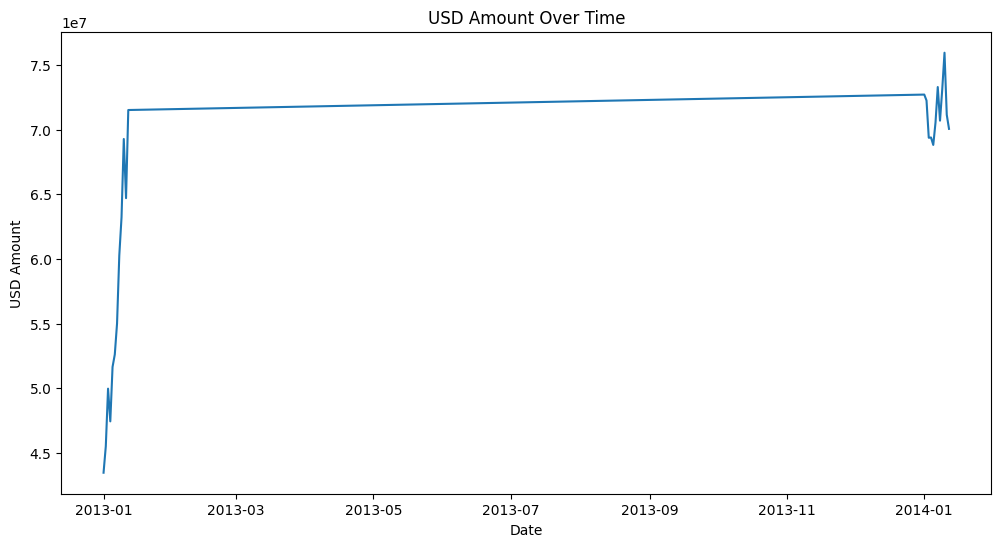

In [31]:
# Time Series Analysis
platform_time_series = platform_df.groupby(['Date']).agg({'Count of events': 'sum', 'Usd Amount': 'sum'}).reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Date', y = 'Usd Amount', data = platform_time_series)
plt.xlabel('Date')
plt.ylabel('USD Amount')
plt.title('USD Amount Over Time')
plt.show()

In [32]:
# Average Transaction Value
platform_avg_trans = platform_df['Usd Amount']/platform_df['Count of events']
print(f"Average Transaction Value: {platform_avg_trans.round(2)}")

Average Transaction Value: 62      7107.23
63      7696.83
64      7038.12
65      7052.07
66      7133.22
         ...   
827    20523.68
828    20135.39
829    21658.84
830    20970.21
831    20105.30
Length: 202, dtype: float64


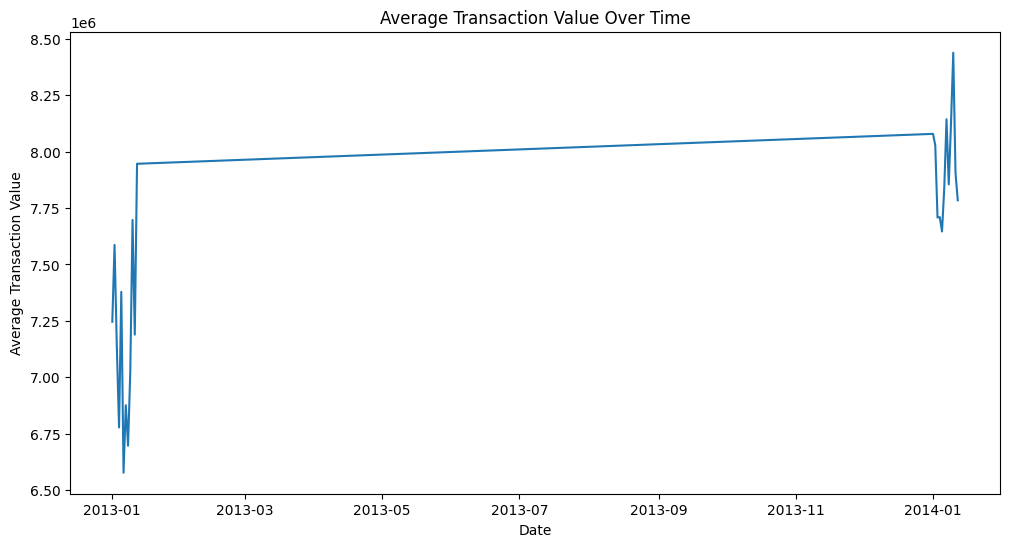

In [33]:
# Plotting average transaction value over time
platform_avg_trans_overtime = platform_df.groupby('Date')['Usd Amount'].mean()
plt.figure(figsize = (12, 6))
sns.lineplot(x = platform_avg_trans_overtime.index, y = platform_avg_trans_overtime.values)
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value Over Time')
plt.show()


Correlation: 0.85


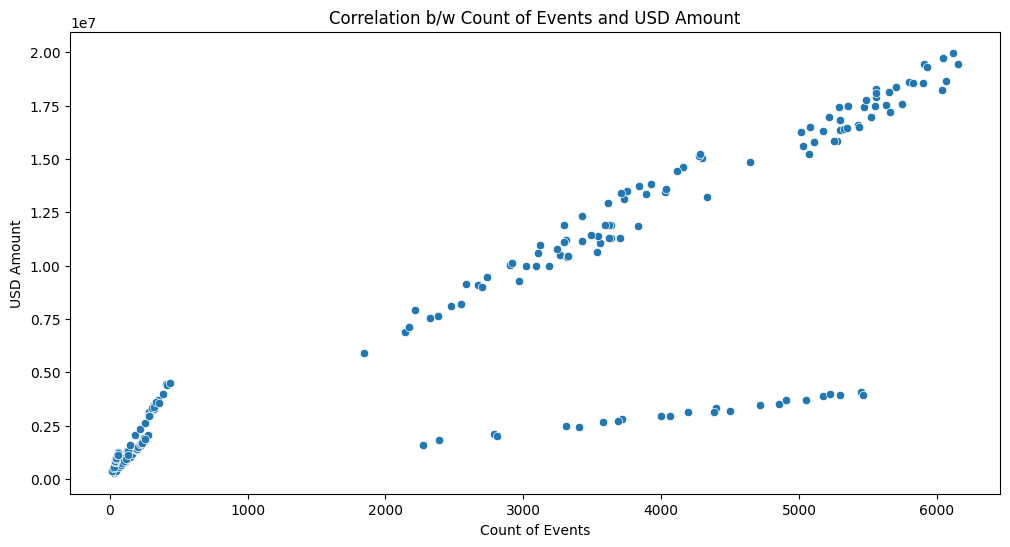

In [34]:
# Correlation b/w Count of events and Usd Amount
platform_corr = platform_df['Count of events'].corr(platform_df['Usd Amount'])
print(f"Correlation: {platform_corr.round(2)}")

plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Count of events', y = 'Usd Amount', data = platform_df)
plt.xlabel('Count of Events')
plt.ylabel('USD Amount')
plt.title('Correlation b/w Count of Events and USD Amount')
plt.show()